In [48]:
from pandas_datareader import data

In [3]:
aapl = data.DataReader("AAPL", 
                       start='2000-1-1', 
                       end='2020-12-31', 
                       data_source='yahoo')

In [4]:
aapl = aapl.reset_index()

In [5]:
aapl['Year'] = aapl['Date'].dt.year
aapl['month'] = aapl['Date'].dt.month
aapl['day'] = aapl['Date'].dt.day

In [6]:
def quarter(row):
    if row['month'] == 1 or row['month'] == 2 or row['month'] == 3:
        return 1
    elif row['month'] == 4 or row['month'] == 5 or row['month'] == 6:
        return 4
    elif row['month'] == 7 or row['month'] == 8 or row['month'] == 9:
        return 7
    else:
        return 10

aapl['quarter'] = aapl.apply(quarter, axis =1)

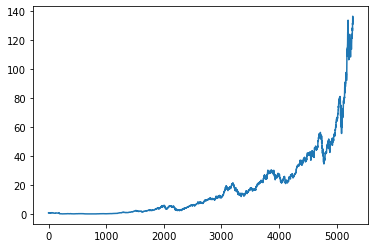

In [7]:
import matplotlib.pyplot as plt
plt.plot(aapl['Adj Close'])
plt.show()

In [8]:
import pandas as pd

data = pd.read_csv('data_usa.csv', index_col=0)

data_aapl = data[data['year'] >= 2000 ]
data_aapl

,DATE,GDP,growth_rate,year,month,jobs,growth_jobs
212,2000-01-01,10002.857,1.045308,2000,1,131005,0.636057
213,2000-04-01,10247.679,2.447521,2000,4,131888,0.674020
214,2000-07-01,10319.825,0.704023,2000,7,132236,0.263860
215,2000-10-01,10439.025,1.155058,2000,10,132351,0.086966
216,2001-01-01,10472.879,0.324302,2001,1,132698,0.262182
...,...,...,...,...,...,...,...
291,2019-10-01,21729.124,0.866119,2019,10,151524,0.404869
292,2020-01-01,21539.689,-0.871802,2020,1,152234,0.468573
293,2020-04-01,19520.114,-9.376064,2020,4,130161,-14.499389
294,2020-07-01,21170.252,8.453526,2020,7,139566,7.225667


In [9]:
aapl_final = pd.merge(left = data_aapl.reset_index(drop=True), right = aapl, left_on = 'month', right_on = 'quarter', how= 'left')

In [10]:
aapl_final = aapl_final[['Date','GDP','growth_rate','jobs','growth_jobs','High','Low','Open','Close','Volume','Adj Close','quarter','Year','month_y','day']].set_index('Date')

aapl_final

,GDP,growth_rate,jobs,growth_jobs,High,Low,Open,Close,Volume,Adj Close,quarter,Year,month_y,day
Date,,,,,,,,,,,,,,
2000-01-03,10002.857,1.045308,131005,0.636057,1.004464,0.907924,0.936384,0.999442,535796800.0,0.860883,1,2000,1,3
2000-01-04,10002.857,1.045308,131005,0.636057,0.987723,0.903460,0.966518,0.915179,512377600.0,0.788302,1,2000,1,4
2000-01-05,10002.857,1.045308,131005,0.636057,0.987165,0.919643,0.926339,0.928571,778321600.0,0.799837,1,2000,1,5
2000-01-06,10002.857,1.045308,131005,0.636057,0.955357,0.848214,0.947545,0.848214,767972800.0,0.730621,1,2000,1,6
2000-01-07,10002.857,1.045308,131005,0.636057,0.901786,0.852679,0.861607,0.888393,460734400.0,0.765229,1,2000,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24,21487.896,1.500426,142545,2.134474,133.460007,131.100006,131.320007,131.970001,54930100.0,131.773087,10,2020,12,24
2020-12-28,21487.896,1.500426,142545,2.134474,137.339996,133.509995,133.990005,136.690002,124486200.0,136.486053,10,2020,12,28
2020-12-29,21487.896,1.500426,142545,2.134474,138.789993,134.339996,138.050003,134.869995,121047300.0,134.668762,10,2020,12,29


In [11]:
X = aapl_final.drop(['GDP','jobs','Close','Volume'], axis = 1)
y = aapl_final['Close']

X_train = X[:105416]
y_train = y[1:105417]

X_test = X[105416:len(X)-1]
y_test = y[105417:]

In [12]:
import xgboost

xgb_reg = xgboost.XGBRegressor()
xgb_reg.fit(X_train, y_train)
display(xgb_reg.score(X_test,y_test))
display(xgb_reg.score(X_train,y_train))

[11:50:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.9976519419965243

0.99736052171501

In [13]:
pred = xgb_reg.predict(X_test)

In [14]:
from sklearn.metrics import r2_score


r2_score(y_test, pred)

0.9976519419965243

In [20]:
from sklearn.model_selection import cross_validate

results = cross_validate(xgb_reg,X_train, y_train, cv = 10)


[13:44:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:44:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:44:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:44:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:44:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:44:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:44:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:44:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:44:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

In [21]:
results['test_score'].mean()
results['test_score']

array([0.99741904, 0.99722016, 0.99756025, 0.99732901, 0.99699108,
       0.99713744, 0.99725153, 0.99733651, 0.99713527, 0.99731269])

In [21]:
import pickle

pickle.dump(xgb_reg, open('model_aapl.p', 'wb'))